#### 광고제거 및 불용어 처리 및 클러스터링

##### 광고 제거
- 크롤링 파일 로드

In [617]:
from tqdm import tqdm
tqdm.pandas()
#data['doc']=data['doc'].progress_apply(lambda x : clean_text(x))

In [618]:
import pandas as pd
import numpy as np

#크롤링 데이터 불러오기
#본인이 크롤링한 파일 업로드
data=pd.read_csv('아이돌인스타그램(데이터합치기).csv', encoding='utf-8-sig')
data

,Unnamed: 0,time,review,url
0,0,2022. 3. 30. 23:57,"Style news 선미 인스타그램 속 가방, 셋업 코디 패션...",https://blog.naver.com/lovegono/222687454926
1,1,2022. 5. 9. 13:10,지수 드라마 [설강화] 220504 배우 김혜윤 인스타그램에 ...,https://blog.naver.com/syr03051/222723113775
2,2,2022. 2. 16. 14:00,"fashion 제니 화보 패션, 인스타그램 속 캘빈클라인 언더...",https://blog.naver.com/hyperealism/222649161213
3,3,2022. 9. 29. 8:10,"블핑/ 인스타,트위터,SNS 220901 블랙핑크 리사 인스타...",https://blog.naver.com/syr03051/222885506031
4,4,2022. 9. 2. 14:52,BLACKPINK 블랙핑크 지수 인스타그램 사진들 모음 202...,https://blog.naver.com/fenergy12/222864930875
...,...,...,...,...
38581,229,2022. 3. 13. 21:42,정보 웰리카 크리스탈 콜라겐 비오틴까지 챙긴 기능성 콜라겐 ...,https://blog.naver.com/meinjess/222671625483
38582,230,2022. 6. 13. 1:22,SHOPPING 키라키라! 핫한 인스타그램 셀럽백 KAR...,https://blog.naver.com/reeie80/222770518097
38583,231,2022. 3. 6. 12:58,리뷰 크리스탈 문진 2만원대 선물 추천 #마이시리즈 ...,https://blog.naver.com/poooo_rin/222665188415
38584,232,2022. 9. 26. 18:00,"Celeb N Style 크리스탈, 김도연, 김민주, 이...",https://blog.naver.com/99551414/222884824810


In [619]:
#필요없는 컬럼 삭제
del data['Unnamed: 0']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38586 entries, 0 to 38585
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    38586 non-null  object
 1   review  38586 non-null  object
 2   url     38586 non-null  object
dtypes: object(3)
memory usage: 904.5+ KB


In [620]:
len(data)

38586

In [621]:
#중복행 제거
data.drop_duplicates(inplace=True)
len(data)

22922

In [622]:
#결측치 개수 확인
data.isnull().sum()

time      0
review    0
url       0
dtype: int64

In [623]:
#결측치 삭제 후 적용(저장)
data.dropna(inplace=True)
#결측치 제거 후 데이터 수 확인
len(data)

22922

In [ ]:
#'doc'컬럼 생성
data['doc']=data.review

In [624]:
#'review컬럼 'doc'컬럼으로 이름 변경
#data.rename(columns={'review':'doc'}, inplace=True)
#data.head()

,time,doc,url
0,2022. 3. 30. 23:57,"Style news 선미 인스타그램 속 가방, 셋업 코디 패션...",https://blog.naver.com/lovegono/222687454926
1,2022. 5. 9. 13:10,지수 드라마 [설강화] 220504 배우 김혜윤 인스타그램에 ...,https://blog.naver.com/syr03051/222723113775
2,2022. 2. 16. 14:00,"fashion 제니 화보 패션, 인스타그램 속 캘빈클라인 언더...",https://blog.naver.com/hyperealism/222649161213
3,2022. 9. 29. 8:10,"블핑/ 인스타,트위터,SNS 220901 블랙핑크 리사 인스타...",https://blog.naver.com/syr03051/222885506031
4,2022. 9. 2. 14:52,BLACKPINK 블랙핑크 지수 인스타그램 사진들 모음 202...,https://blog.naver.com/fenergy12/222864930875


##### 광고글의 특징
- 1.특정 단어를 포함한 게시글: "제공받아", "지원받아", "해당업체" 등등
- 2.(네이버 블로그 특징) 게시글 길이가 3000자 이상이면 광고글 상위 노출 조건에 해당하여 광고로 볼 수 있음

1번 특징 제거
- 광고글 특징을 stopwords로 지정하여 해당 글은 삭제할 수 있도록 한다.
- 분석가 판단 하에 추가 광고 문구를 확인하여 stopwords 리스트에 추가해준다.

In [625]:
Stopwords = ["제공받아", "제공받았", "지원받아", "지원받았", "해당업체", "해당업체",
            "해시태그", "협찬받아", "업체로부터", "체험후기", "무상지급받은", "무상지급"
            ,"카카오톡플러스친구", "톡톡하세요", "네이버톡톡", "무상지원", "카카오톡 플러스친구"
            , "스토리링크", "스토리 링크", "카카오 채널", '미용실', '헤어', '열애', '연애', '수상', '카페', '노트'
            ,'디퓨저', '챠밍오', '카톡', '연락주세요', '문의주세요', '관심뉴스', '핑핑 코디 벌써부터 주문 많아요'
            , '로제와인', '맛집', '정글피쉬', '반영구', '김애교', '뉴스', '기자', '응모자', '미장셴'
            , "노래", "응모자", "미장센", "스포츠한국", "라이프매니저", "시현하다", "기부", "필독", '나인티고 안혜연'
            , "스포티파이", "MBTI", '방송댄스', '댄스학원', '출생', '존맛탱', '파스타', '쿠시마사','침대', '류이서'
            , '김세정', '전자담배', '밥집', '인테리어', '선제골', '시공', '메가비타민', '미아방지팔찌', "무당벌레","롯데호텔"
            , "신청양식", "텀블러", "블랙박스", "꿈틀이샘", "여행", "생명과학", "와인", "살림", "요리", "커트", "소설", "학대", "왁싱", "애플워치"
            , "징크스", "어린이집", "꽃집"
            ]

In [626]:
#Stopwords가 들어간 글은 삭제
#~:review에서 Stopwords가 들어가있으면 제거하라는 의미
data = data[~data['doc'].str.contains('|'.join(Stopwords))]
data = data.reset_index(drop=True)
data

,time,doc,url
0,2022. 5. 9. 13:10,지수 드라마 [설강화] 220504 배우 김혜윤 인스타그램에 ...,https://blog.naver.com/syr03051/222723113775
1,2022. 2. 16. 14:00,"fashion 제니 화보 패션, 인스타그램 속 캘빈클라인 언더...",https://blog.naver.com/hyperealism/222649161213
2,2022. 9. 29. 8:10,"블핑/ 인스타,트위터,SNS 220901 블랙핑크 리사 인스타...",https://blog.naver.com/syr03051/222885506031
3,2022. 9. 2. 14:52,BLACKPINK 블랙핑크 지수 인스타그램 사진들 모음 202...,https://blog.naver.com/fenergy12/222864930875
4,2022. 5. 7. 1:03,"게시판 블랙핑크 로제 - 220507, roses_are_ro...",https://blog.naver.com/199651/222723356800
...,...,...,...
8505,2022. 9. 18. 6:40,게시판 크리스탈 정수정 근황 좋아보여요! 광고실행사...,https://blog.naver.com/xkyzscczg/222875005243
8506,2022. 10. 22. 21:23,Wallpaper 크리스탈 배경화면(26)/크리스탈 인스타그램...,https://blog.naver.com/snanyilovem/222907408682
8507,2022. 10. 8. 11:20,스타패션 크리스탈 정수정 인스타그램 스트라이프 럭비 티셔츠 /...,https://blog.naver.com/in_korean_style/2228947...
8508,2022. 3. 3. 17:31,MUSEE_DIARY MUSÉE_ [뮤제] 크리스탈의 코스모폴...,https://blog.naver.com/estelle2005/222662948387


##### 게시글 길이가 3000자 이상이면 광고글 상위 노출 조건이기에 제거

In [627]:
ix = data['doc'].str.len()>3000
data=data.loc[~ix]
data=data.reset_index(drop=True)
data

,time,doc,url
0,2022. 5. 9. 13:10,지수 드라마 [설강화] 220504 배우 김혜윤 인스타그램에 ...,https://blog.naver.com/syr03051/222723113775
1,2022. 9. 29. 8:10,"블핑/ 인스타,트위터,SNS 220901 블랙핑크 리사 인스타...",https://blog.naver.com/syr03051/222885506031
2,2022. 9. 2. 14:52,BLACKPINK 블랙핑크 지수 인스타그램 사진들 모음 202...,https://blog.naver.com/fenergy12/222864930875
3,2022. 5. 7. 1:03,"게시판 블랙핑크 로제 - 220507, roses_are_ro...",https://blog.naver.com/199651/222723356800
4,2022. 1. 15. 16:42,로제 인스타그램 22.1.15 블랙핑크 로제 인스타그램 ...,https://blog.naver.com/alwayshappiness211/2226...
...,...,...,...
7701,2022. 7. 16. 9:37,스타일링TIP 따라하고 싶은 셀럽들의 폴로 랄프로렌 셔츠 스타...,https://blog.naver.com/kims718/222813529091
7702,2022. 9. 18. 6:40,게시판 크리스탈 정수정 근황 좋아보여요! 광고실행사...,https://blog.naver.com/xkyzscczg/222875005243
7703,2022. 10. 22. 21:23,Wallpaper 크리스탈 배경화면(26)/크리스탈 인스타그램...,https://blog.naver.com/snanyilovem/222907408682
7704,2022. 10. 8. 11:20,스타패션 크리스탈 정수정 인스타그램 스트라이프 럭비 티셔츠 /...,https://blog.naver.com/in_korean_style/2228947...


In [629]:
data.doc = data.doc.str.replace("[^가-힣]"," ") # 한글만 남기고 특수문자, 숫자, 영어 삭제
data.doc = data.doc.str.replace("\s+", " ") # white space 삭제
data['doc']=data['doc'].str.replace('"', ' ')
data['doc']=data['doc'].str.replace(',', ' ')
data['doc']=data['doc'].str.replace('\n', ' ')
data['doc']=data['doc'].str.replace('!', ' ')
data['doc']=data['doc'].str.replace('.', ' ')
data['doc']=data['doc'].str.replace('복사 이웃추가 본문 기타 기능 지도로 보기 전체지도지도닫기 공유하기', ' ')
data['doc']=data['doc'].str.replace('복사 이웃추가 본문 기타 기능 공유하기', ' ')
data['doc']=data['doc'].str.replace('복사 이웃추가 본문 기타 기능 공유하기 신고하기', ' ')
data['doc']=data['doc'].str.replace('자세한 정보는 아래 공식홈페이지에서 확인하세요', ' ')
data['doc']=data['doc'].str.replace('복사 이웃추가 본문 기타 기능 지도로 보기 전체지도지도닫기 공유하기 신고하기', ' ')
data['doc']=data['doc'].str.replace('사진 및 동영상 보기', ' ')
data['doc']=data['doc'].str.replace('신고하기', ' ')
data['doc']=data['doc'].str.replace('즐겨찾기', ' ')
data['doc']=data['doc'].str.replace('사진 및 동영상', ' ')
data['doc']=data['doc'].str.replace('도움말라이센스', ' ')
data['doc']=data['doc'].str.replace('동영상 인코딩 중입니다', ' ')
data['doc']=data['doc'].str.replace('분 이상 소요될 수 있으며 영상의 길이에 따라 소요 시간은 달라집니다', ' ')
data['doc']=data['doc'].str.replace('도움말 멀티트랙의 트랙별 영상은 우측 관련영상에서 볼 수 있습니다', ' ')
data['doc']=data['doc'].str.replace('선거광고 안내 음소거 화질 선택 옵션자동 자동 화질 전체화면 광고정보 더보기초 후 초 후 재생 광고 후 계속됩니다', ' ')
data['doc']=data['doc'].str.replace('공유소스 코드 주소복사 소스 복사 미지원으로 코드 퍼가기 기능은 더 이상 지원되지않습니다', ' ')
data['doc']=data['doc'].str.replace('도움말 플레이어 복사 레이어 닫기', ' ')
data['doc']=data['doc'].str.replace('마우스를 드래그 하세요', ' ')
data['doc']=data['doc'].str.replace('재생 수', ' ')
data['doc']=data['doc'].str.replace('새해 복 많이 받으시래요', ' ')
data['doc']=data['doc'].str.replace('새해 복 많이 많이 받으세요', ' ')
data['doc']=data['doc'].str.replace('행크', ' ')
data['doc']=data['doc'].str.replace('여러분', ' ')
data['doc']=data['doc'].str.replace('홍대 브랜드 센터 서울특별시 마포구 양화로 층 층', ' ')
data['doc']=data['doc'].str.replace('서울특별시 강남구 논현로 길', ' ')
data['doc']=data['doc'].str.replace('블랙', ' ')
data['doc']=data['doc'].str.replace('핑크', ' ')

In [630]:
len(data)

7706

In [631]:
#중복행 제거
data.drop_duplicates(['doc'], inplace=True)

#새롭게 인덱스부여
data.reset_index(inplace=True)

len(data)

7089

In [632]:
data.doc[253]

' 산다라박 인스타그램 옷 신발 패션은 악셀 아리가토 반팔 니트 티셔츠 스니커즈 쫑긋이     산다라박 인스타그램 옷 신발 패션은 악셀 아리가토 반팔 니트 티셔츠 스니커즈 안녕하세요 쫑긋입니다 오늘은 패션계에서도 정말 유명한 패셔니스타 산다라박의사복 패션을 살펴보려고 합니다 그녀는 인스타그램에서도 늘 다양한 패션을선보이고 있는데요 최근 올라온 인스타그램 사진을 볼까요 올  코디지만 찰떡같이 소화한 그녀 역시 뭘 입어도 패셔니스타는 잘 소화하네요 무엇보다   컬러의 신발이 포인트인 것 같아요 요즘 산다라박의 인스타그램 그리고 방송에서 보면악셀 아리가토라는 스위스 브랜드를 많이 착용하더라고요 찾아보니까 색감이 너무 이쁜 스니커즈였어요 는 빈티지에서 영감을 받은 디자인 선보이는데요 안감은 재활용 페트병과 재활용 플라스틱을 사용하여 생산된 친환경적인 제품이라고 해요 친환경적인 제품이지만 그렇다고 디자인을 빼놓지 않아 데일리에도 코디하기 좋겠더라고요 또 그녀의 인스타그램에서 볼 수 있는 이 니트 티셔츠역시 악셀 아리가토 제품이더라고요 파스텔 컬러인 이 니트는 산다라박의 밝은 피부톤을더욱 밝게 보여주는 효과를 주었네요 는 세로 짜임 니트의 옷인데요 굉장히 심플한 디자인이라 어떤 옷과도 부담 없이 코디가 가능해요 소매 부분은 접이식 커프로 디자인 되어 있으며 클래식한 크루넥 실루엣이며 중앙 부분에 자를 수를 놓아 포인트를 주었고 티셔츠는 슬림핏이에요 악셀 아리가토 는 스웨덴 출신 과 가 년에 출시한 컨템포러리 패션 브랜드로 옷 그리고 신발 등다양한 아이템들을 판매하고 있다고 해요 이렇게 간단하게 그녀의 인스타그램 사복 패션을 살펴보았는데 어떠셨나요 그럼 오늘 소식은 여기까지 마치며 다음 포스팅도 기대해 주세요 이미지 출처 산다라박 인스타그램 악셀 아리가토 '

In [633]:
#csv로 저장
data.to_csv("아이돌인스타그램_2022(전처리 및 광고제거).csv", encoding='utf-8-sig')

# 형태소 분석(pos-tagging)
- 텍스트 분석을 하기 위해서 단어의 형태로 데이터를 처리해줍니다
- 단어로 만드는 과정에서 1)분석에 불필요한 불용어 제거 2)단어를 사전형으로 처리(가고 있다->
'가다', '있다')
- 명사, 형용사, 동사, 부사의 품사만 분석 대상으로 선정

In [634]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize

In [635]:
from konlpy.tag import Okt

In [ ]:
'''
#워드클라우드 import
from wordcloud import WordCloud

#워드를 카운팅해주는 라이브러리
from collections import Counter

#데이터를 시각화 해주는 라이브러리
import matplotlib.pyplot as plt

#형태소 분석기를 통해 텍스트 정제하기
from konlpy.tag import Okt
okt = Okt()
#뉴스 3개만 뽑아주기
doc = data.doc[:3]
total = ''

for i in doc:
    string = i.replace("\n", '')
    string = string.replace('\'', '')
    total = total + string
    
from konlpy.tag import Okt
okt = Okt()

stopwords = ['있다', '하다', '되다']

def extract_tag(string):
    
    result_words = []

    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:       
        if tag in ['Verb', 'Noun', 'Adjective']:
            if word not in stopwords:
                result_words.append(word)
    return result_words

change_doc=[]
for i in tqdm(data['doc']):
    change_doc.append(extract_tag(i))
data['change']=change_doc

#빈도수
count = Counter(change_doc)
count

#빈출단어 뽑기
count.most_common(10)
'''

In [636]:
#원하는 태그 추출&불용어 제거
okt = Okt()

#불용어
#한국어불용어사전 불러오기
stopwords = pd.read_csv('ko-stopwords.csv')

stopwords=list(stopwords['stopwords'])
stopwords.extend(['되다', '보다', '되어다', '하다', '가다' , '받다', '드리다', '자다', '너무', '이다', '없다', '만', '이렇게', '이미지'
                  , '말', '파', '눈', '분', '네', '위', '시', '감', '전', '후', '에스', '개', '데', '코드', '명', '여', '싶다'
                  , '안', '전', '일리', '에이', '후', '백', '날', '만', '듯', '드', '님', '미국', '통해', '몰', '점'
                  , '지난', '필라테스', '여러', '포스팅' 
                  ,'인스타그램', '리사', '지수', '블핑', '제니', '로제', '박채영', '선미', '나연', '카리나'
                  , '조이', '윤아', '태연', '전소미', '산다라박', '크리스탈', '손나은', '수지', '안유진', '장원영'
                 ]) #불용어 추가
stopwords=set(stopwords)

#형태소 분석 함수 만들기
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)#형태소 분석, 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag in ['Noun', 'Adjective', 'Verb', 'Adverb'] if word not in stopwords]
    return words


In [637]:
#형태소 분석 적용
tokenizing_doc=[]
for i in tqdm(data['doc']):
    tokenizing_doc.append(okt_pos_tagging(i))
data['token']=tokenizing_doc#새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원

100%|██████████| 7089/7089 [07:58<00:00, 14.81it/s]


In [638]:
data.token

0                            [드라마, 설강화, 배우, 김혜윤, 배우, 김혜윤]
1                                [인스타, 트위터, 댓글, 프루덴셜, 센터]
2                        [사진, 모음, 사진, 모음, 사진, 모음, 사진, 모음]
3                                                   [게시판]
4                             [스토리, 포에버, 팔로워, 팔로잉, 게시, 물]
                              ...                        
7084    [폴로, 셔츠, 포니, 가방, 캐다, 얼룩, 완성, 걸스, 픽, 폴로, 셔츠, 포니...
7085    [스타, 일링, 따르다, 셀럽, 폴로, 랄프, 로렌, 셔츠, 스타, 일링, 기은세,...
7086    [게시판, 정수정, 근황, 좋다, 보이다, 광고, 실, 행사, 배우, 정수정, 님근...
7087    [스타, 패션, 정수정, 스트라이프, 럭비, 티셔츠, 폴로, 랄프, 로렌, 안녕하다...
7088    [패션, 정보, 셀럽, 사랑, 헤이즈, 하리보, 목걸이, 모음, 히, 요정, 안녕하...
Name: token, Length: 7089, dtype: object

In [639]:
#명사 추출 
text_noun=[okt.nouns(doc) for doc in data.doc]
data['text_noun'] = text_noun
data['text_noun'] = data.text_noun.apply(lambda x: [a for a in x if a not in stopwords])

In [640]:
data.head()

,index,time,doc,url,token,text_noun
0,0,2022. 5. 9. 13:10,지수 드라마 설강화 배우 김혜윤 인스타그램에 지수 배우 김혜윤님 인스...,https://blog.naver.com/syr03051/222723113775,"[드라마, 설강화, 배우, 김혜윤, 배우, 김혜윤]","[드라마, 설강화, 배우, 김혜윤, 배우, 김혜윤]"
1,1,2022. 9. 29. 8:10,블핑 인스타 트위터 리사 인스타그램 리사 인스타그램 지수 댓글 ...,https://blog.naver.com/syr03051/222885506031,"[인스타, 트위터, 댓글, 프루덴셜, 센터]","[인스타, 트위터, 댓글, 프루덴셜, 센터]"
2,2,2022. 9. 2. 14:52,지수 인스타그램 사진들 모음 지수 인스타그램 사진들 모음 ...,https://blog.naver.com/fenergy12/222864930875,"[사진, 모음, 사진, 모음, 사진, 모음, 사진, 모음]","[사진, 모음, 사진, 모음, 사진, 모음, 사진, 모음]"
3,3,2022. 5. 7. 1:03,게시판 로제 인스타그램을 박채영 로제,https://blog.naver.com/199651/222723356800,[게시판],[게시판]
4,4,2022. 1. 15. 16:42,로제 인스타그램 로제 인스타그램 스토리 포에버 팔로워 만명 팔로잉...,https://blog.naver.com/alwayshappiness211/2226...,"[스토리, 포에버, 팔로워, 팔로잉, 게시, 물]","[스토리, 포에버, 팔로워, 팔로잉, 게시, 물]"


##### 워드클라우드

In [641]:
#리스트 차원 낮춰주는 함수 생성
def flatten(l):
    flatlist = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [642]:
data1 = data.token.tolist() #series -> list
data2  = flatten(data1)
data2[:20]

['드라마',
 '설강화',
 '배우',
 '김혜윤',
 '배우',
 '김혜윤',
 '인스타',
 '트위터',
 '댓글',
 '프루덴셜',
 '센터',
 '사진',
 '모음',
 '사진',
 '모음',
 '사진',
 '모음',
 '사진',
 '모음',
 '게시판']

In [643]:
text = nltk.Text(data2)
text

<Text: 드라마 설강화 배우 김혜윤 배우 김혜윤 인스타 트위터...>

In [644]:
from wordcloud import WordCloud

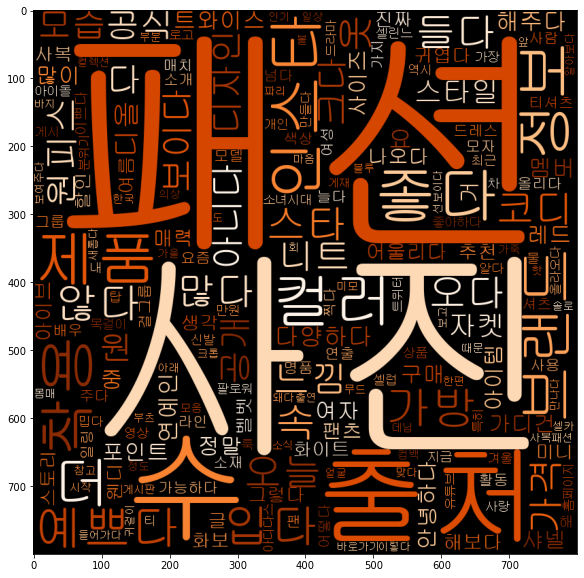

In [645]:
import matplotlib.pyplot as plt
#명사, 동사, 형용사, 부사로 워드클라우드
font_path = '본인 컴퓨터의 폰트 경로'
wordclouds = WordCloud(width=800, height=800, background_color='Black', colormap='Oranges', font_path = 'C:\Windows\Fonts\gulim.ttc')

from collections import Counter
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize = (10, 10))
plt.imshow(wordclouds.to_array())
plt.savefig('워드클라우드_다.png', bbox_inches='tight')
plt.show()

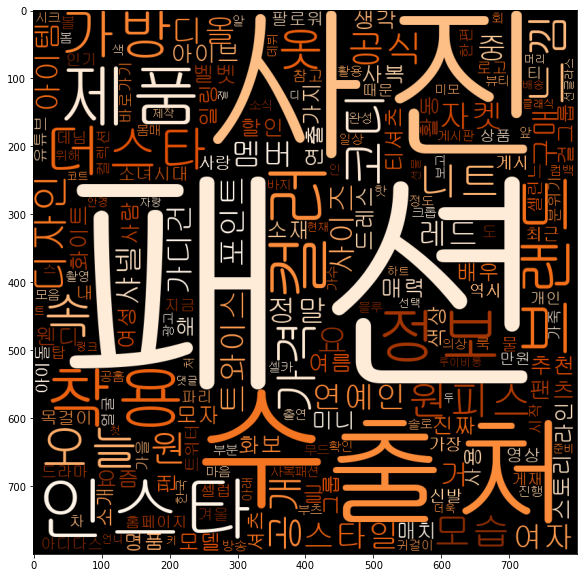

In [646]:
#명사로만 워드클라우드
df_noun = data.text_noun.tolist()
df_noun2 = flatten(df_noun)
text2 = nltk.Text(df_noun2)

wordclouds = WordCloud(width=800, height=800, background_color='Black', colormap='Oranges', font_path = 'C:\Windows\Fonts\gulim.ttc')

from collections import Counter
count = Counter(text2)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize = (10, 10))
plt.imshow(wordclouds.to_array())
plt.savefig('워드클라우드_명사.png', bbox_inches='tight')
plt.show()

##### 군집분석 - Clustering(Actor 도출)

In [648]:
data3 = []
for i in data1:
    if len(i) == 0 :
        data3.append('')
        continue
    string = i[0]
    for w in i[1:]: #첫번째 이후 단어부터 토큰으로 이어 붙여줌
        string += " " #단어 사이는 띄어쓰기로 연결
        string += w #(띄어쓰기 후 다음 단어) 써주기를 반복
    data3.append(string)
data3#쉼표를 기준으로 document가 구분됨(,)

['드라마 설강화 배우 김혜윤 배우 김혜윤',
 '인스타 트위터 댓글 프루덴셜 센터',
 '사진 모음 사진 모음 사진 모음 사진 모음',
 '게시판',
 '스토리 포에버 팔로워 팔로잉 게시 물',
 '인스타 트위터 인스타 스토리 파리패션위크 샤넬 블링크 좋다 수주 인스타 스토리 모델 수주 파리 프랑스 파리',
 '패션 미용 레드 벨벳 예리 인스타 케이 강아지 말티즈 티셔츠 네이비 민 모란 레드 벨벳 예리 인스타 케이 강아지 말티즈 티셔츠 네이비 출처 예리 속 예리 착용 강아지 티 제품 출처 예리 예리 착용 강아지 티 케이 제품 가격 천원 출처 예리 케이 돌고래 키우다 디자이너 꿈 출발 엉뚱하다 사랑스럽다 무드 바탕 시작 말티즈 아카이브 티셔츠 네이비 버핏 사랑스럽다 시크 세련되다 컨템포러리 룩 제안 베이직 아이템 트렌디 풀다 고급스럽다 웨어러블 유니섹스 의류 악세다 서리 디자인 케이 은 말티즈 구름 돌고래 스토리 담다 컬렉션 은 구름 행복하다 위트 순간 담다 언제나 귀엽다 이야기 다양하다 그래픽 기법 컬러 연출 티 화이트 멜란지 화이트 네이비 그린 브라운 룰 리안 블루 컬러 구성 말티즈 아카이브 티셔츠 버핏 유니섹스 오다 핏 우먼 두 가지 버전 출시',
 '인스타 트위터 인스타 스토리 유튜브 젠 튜브 올라가다 유튜브 유튜브 브이 로그',
 '연예 소식 느낌 인 플루 셀카 사진 모음 무난 무난 해 느낌 인 플루 셀카 사진 모음 느낌 인 플루 셀카 사진 모음 느낌 인 플루 셀카 사진 모음 완전 여신',
 '게시판 컴백 새 앨범 녹음 막바지 드디어 돌아오다 엔터테인먼트 따르다 늘다 현재 새 앨범 녹음 작업 막바지 단계 중 뮤직비디오 촬영 돌입 오다 신곡 발표 올여름 뜨겁다 달구다 계획 측은 오랜 기간 심혈 기울이다 완성 다운 음악 준비 돼다 며 컴백 연말 팝 걸그룹 사상 최대 규모 월드 투어 나서다 위상 걸 맞다 대형 프로젝트 꾸준하다 이어지다 완전체 컴백 약 개월 늘다 정규 집 발표 앞서 선공 타이틀 스페셜 콜라보 음원 연달 내놓다 파죽지세 인기 행진 편 바 당시

In [649]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 

vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(data3)

In [650]:
from collections import defaultdict
word2id = defaultdict(lambda:0) #value가 없는 key인 경우 error 대신 0을 출력

In [651]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature]=idx

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [652]:
tfidf=[]
for i, sent in enumerate(data3):
    tfidf.append([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])

In [653]:
tfidf[4]

[('스토리', 0.34328121215769863),
 ('포에버', 0.6303179055730254),
 ('팔로워', 0.4002467078858637),
 ('팔로잉', 0.43010660619641883),
 ('게시', 0.37372212595229454),
 ('물', 0.0)]

##### 토픽 개수 정하기

In [654]:
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

In [655]:
#from gensim import corpora, models

dictionary = corpora.Dictionary(data1)
dictionary

In [656]:
#tuple로 mapping해주는 함수, doc2bow
#단어를 index로 mapping, 몇번 나왓는지 
corpus = [dictionary.doc2bow(text)for text in data1]

In [657]:
corpus[:1]

[[(0, 2), (1, 1), (2, 2), (3, 1)]]

In [658]:
import gensim
from gensim.models import CoherenceModel

In [659]:
#coherence 확인(군집 평가)

#coherenceModel_lda = CoherenceModel(model=lda, texts=data1, dictionary=dictionary, topn=10)
#coherence_model_lda.get_coherence()

In [660]:
values=[]
for i in range(2, 10):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    #                           혼잡도 낮을수록 좋음
    values.append(ldamodel.log_perplexity(corpus))

Text(0, 0.5, 'Score')

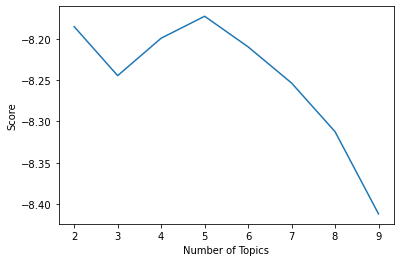

In [661]:
x = range(2, 10)
plt.plot(x, values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

In [662]:
from gensim.models import CoherenceModel
coherence_values = []
for i in range(2, 10):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i,id2word=dictionary)

    coherence_model_lda = CoherenceModel(model=ldamodel, texts=data1, dictionary=dictionary, topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)




Text(0, 0.5, 'Score')

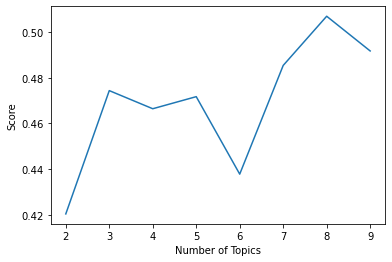

In [663]:
x=range(2,10)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

from gensim.models import CoherenceModel

coherence_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                              num_topics=i,
                                              id2word=dictionary)
    
    coherence_model_lda = CoherenceModel(model=ldamodel,
                                        texts = data1,
                                        dictionary=dictionary,
                                        topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


##### 클러스터링

In [664]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [665]:
sp_matrix1 = vectorizer.fit_transform(data3)

In [666]:
df1 = pd.DataFrame(sp_matrix1.toarray(), columns=vectorizer.get_feature_names())

In [667]:
cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')

In [668]:
result = cluster.fit_predict(df1)

In [669]:
df_ward = data.copy()

In [670]:
df_ward['cluster'] = list(result)

In [671]:
df_ward

,index,time,doc,url,token,text_noun,cluster
0,0,2022. 5. 9. 13:10,지수 드라마 설강화 배우 김혜윤 인스타그램에 지수 배우 김혜윤님 인스...,https://blog.naver.com/syr03051/222723113775,"[드라마, 설강화, 배우, 김혜윤, 배우, 김혜윤]","[드라마, 설강화, 배우, 김혜윤, 배우, 김혜윤]",2
1,1,2022. 9. 29. 8:10,블핑 인스타 트위터 리사 인스타그램 리사 인스타그램 지수 댓글 ...,https://blog.naver.com/syr03051/222885506031,"[인스타, 트위터, 댓글, 프루덴셜, 센터]","[인스타, 트위터, 댓글, 프루덴셜, 센터]",1
2,2,2022. 9. 2. 14:52,지수 인스타그램 사진들 모음 지수 인스타그램 사진들 모음 ...,https://blog.naver.com/fenergy12/222864930875,"[사진, 모음, 사진, 모음, 사진, 모음, 사진, 모음]","[사진, 모음, 사진, 모음, 사진, 모음, 사진, 모음]",2
3,3,2022. 5. 7. 1:03,게시판 로제 인스타그램을 박채영 로제,https://blog.naver.com/199651/222723356800,[게시판],[게시판],2
4,4,2022. 1. 15. 16:42,로제 인스타그램 로제 인스타그램 스토리 포에버 팔로워 만명 팔로잉...,https://blog.naver.com/alwayshappiness211/2226...,"[스토리, 포에버, 팔로워, 팔로잉, 게시, 물]","[스토리, 포에버, 팔로워, 팔로잉, 게시, 물]",3
...,...,...,...,...,...,...,...
7084,7700,2022. 10. 12. 15:31,크리스탈 폴로 셔츠 포니 가방 캐주얼룩 완성 걸스픽 크리스탈 폴로 ...,https://blog.naver.com/gguu1029/222898345842,"[폴로, 셔츠, 포니, 가방, 캐다, 얼룩, 완성, 걸스, 픽, 폴로, 셔츠, 포니...","[폴로, 셔츠, 포니, 가방, 얼룩, 완성, 걸스, 픽, 폴로, 셔츠, 포니, 가방...",0
7085,7701,2022. 7. 16. 9:37,스타일링 따라하고 싶은 셀럽들의 폴로 랄프로렌 셔츠 스타일링 크리스탈 기은세 꾸리...,https://blog.naver.com/kims718/222813529091,"[스타, 일링, 따르다, 셀럽, 폴로, 랄프, 로렌, 셔츠, 스타, 일링, 기은세,...","[스타, 일링, 셀럽, 폴로, 랄프, 로렌, 셔츠, 스타, 일링, 기은세, 꾸리, ...",0
7086,7702,2022. 9. 18. 6:40,게시판 크리스탈 정수정 근황 좋아보여요 광고실행사 배우 정수정 및 크리스탈...,https://blog.naver.com/xkyzscczg/222875005243,"[게시판, 정수정, 근황, 좋다, 보이다, 광고, 실, 행사, 배우, 정수정, 님근...","[게시판, 정수정, 근황, 광고, 실, 행사, 배우, 정수정, 님근황, 해바라기, ...",0
7087,7704,2022. 10. 8. 11:20,스타패션 크리스탈 정수정 인스타그램 스트라이프 럭비 티셔츠 폴로 랄프로렌 ...,https://blog.naver.com/in_korean_style/2228947...,"[스타, 패션, 정수정, 스트라이프, 럭비, 티셔츠, 폴로, 랄프, 로렌, 안녕하다...","[스타, 패션, 정수정, 스트라이프, 럭비, 티셔츠, 폴로, 랄프, 로렌, 스트라이...",0


- 덴드로그램

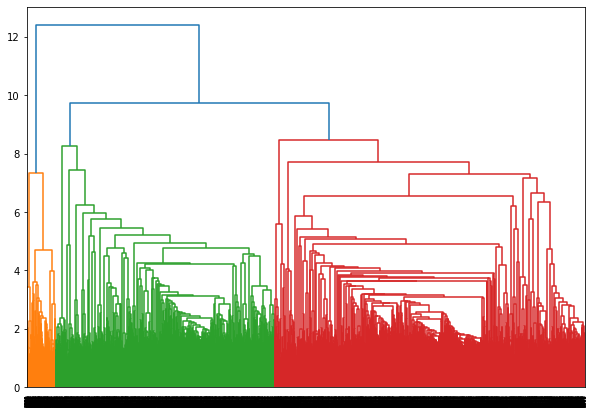

In [672]:
plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(df1, method='ward'))
plt.savefig('덴드로그램.png', bbox_inches='tight')
plt.show()

In [673]:
#파일 저장
import pickle
df_ward.to_pickle('아이돌인스타그램_clustering.pkl')
df_ward.to_csv('아이돌인스타그램_clustering.csv', encoding='utf-8-sig')